In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [33]:
df = pd.read_csv ('/content/spanish-export-utf8.csv', delimiter=";")


# Split the subdate column into date and time and convert the date column to a datetime format

In [4]:
df['date'] = df['subdate'].str.split(' ').str[0]
df['time'] = df['subdate'].str.split(' ').str[1]
df['date'] = pd.to_datetime(df['date'], format='%Y.%m.%d')

In [5]:
df['subdate'] = pd.to_datetime(df['subdate'])



# Convert the mssys_order_brutto_sum column



In [31]:
df['mssys_order_brutto_sum'] = df['mssys_order_brutto_sum'].astype(int)
df.head()


,id,subdate,mssys_bill_country,mssys_bill_zip,mssys_order_brutto_sum,mssys_payment_method,milyen_szinten_allsz_jelenleg_spanyolbol,ajanlas_1_10,date,time
0,4044,2024-02-14 10:26:00,hu,7400,5990,4,Alapszinten tudok,10.0,2024-02-14,10:26
1,4037,2024-02-08 17:22:00,hu,1181,58000,4,Teljesen kezdõ,9.0,2024-02-08,17:22
2,4034,2024-02-06 20:53:00,hu,1145,5990,4,Alapszinten tudok,10.0,2024-02-06,20:53
3,4031,2024-02-02 15:46:00,hu,1185,4990,4,Haladó szint,10.0,2024-02-02,15:46
4,4026,2024-01-28 13:06:00,hu,3815,20990,4,Teljesen kezdõ,10.0,2024-01-28,13:06


# Calculate the sum of the mssys_order_brutto_sum column

In [7]:
sum_mssys_order_brutto_sum = df['mssys_order_brutto_sum'].sum()
sum_mssys_order_brutto_sum

6244889

# Calculate the median of the mssys_order_brutto_sum column

In [8]:
median_mssys_order_brutto_sum = df['mssys_order_brutto_sum'].median()
median_mssys_order_brutto_sum

6139.5

# Calculate the average of the mssys_order_brutto_sum column


In [9]:
avg_mssys_order_brutto_sum = df['mssys_order_brutto_sum'].mean()
avg_mssys_order_brutto_sum

11963.388888888889

# Calculate the sum, median, and average of the mssys_order_brutto_sum column

In [10]:
result = df['mssys_order_brutto_sum'].agg(['sum', 'median', 'mean'])
result

sum       6.244889e+06
median    6.139500e+03
mean      1.196339e+04
Name: mssys_order_brutto_sum, dtype: float64


# Group the data by the mssys_bill_zip column and calculate the sum of the mssys_order_brutto_sum column for each group



In [11]:
sum_mssys_order_brutto_sum_by_mssys_bill_zip = df.groupby('mssys_bill_zip')['mssys_order_brutto_sum'].sum()
sum_mssys_order_brutto_sum_by_mssys_bill_zip.head(10)

mssys_bill_zip
1021    11895
1022     4420
1023    11140
1025    25910
1026    23302
1027    20750
1028    49662
1029     6428
1031    19840
1033    12797
Name: mssys_order_brutto_sum, dtype: int64

# Create a pivot table of the mssys_order_brutto_sum column by date

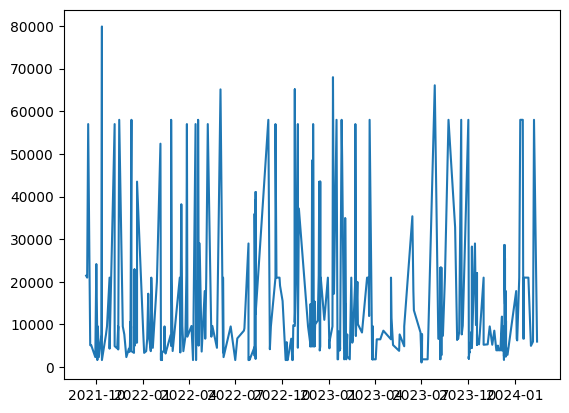

In [12]:
plt.plot(df['date'], df['mssys_order_brutto_sum'])
plt.show()

# Group by date and calculate total revenue

In [13]:
daily_revenue = df.groupby('date')['mssys_order_brutto_sum'].sum().reset_index()

# Adding cumulative revenue to the DataFrame

In [14]:
daily_revenue['cumulative_revenue'] = daily_revenue['mssys_order_brutto_sum'].cumsum()


In [15]:
print(daily_revenue)


          date  mssys_order_brutto_sum  cumulative_revenue
0   2021-09-11                   21450               21450
1   2021-09-13                   20990               42440
2   2021-09-15                   57000               99440
3   2021-09-19                    5140              104580
4   2021-09-21                    5140              109720
..         ...                     ...                 ...
248 2024-01-28                   20990             6169919
249 2024-02-02                    4990             6174909
250 2024-02-06                    5990             6180899
251 2024-02-08                   58000             6238899
252 2024-02-14                    5990             6244889

[253 rows x 3 columns]


# Convert the date to a number of days, with the first value being 0

In [16]:
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])
daily_revenue['day_number'] = (daily_revenue['date'] - daily_revenue['date'].min()).dt.days

# X (independent variable) and y (dependent variable, in this case, cumulative revenue)

In [17]:
X = daily_revenue[['day_number']]
y = daily_revenue['cumulative_revenue']

# Create and fit a linear regression model

In [18]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Calculate the accuracy of the model

In [19]:
r_squared = model.score(X, y)

# Generate predictions

In [20]:
y_pred = model.predict(X)

# Visualization

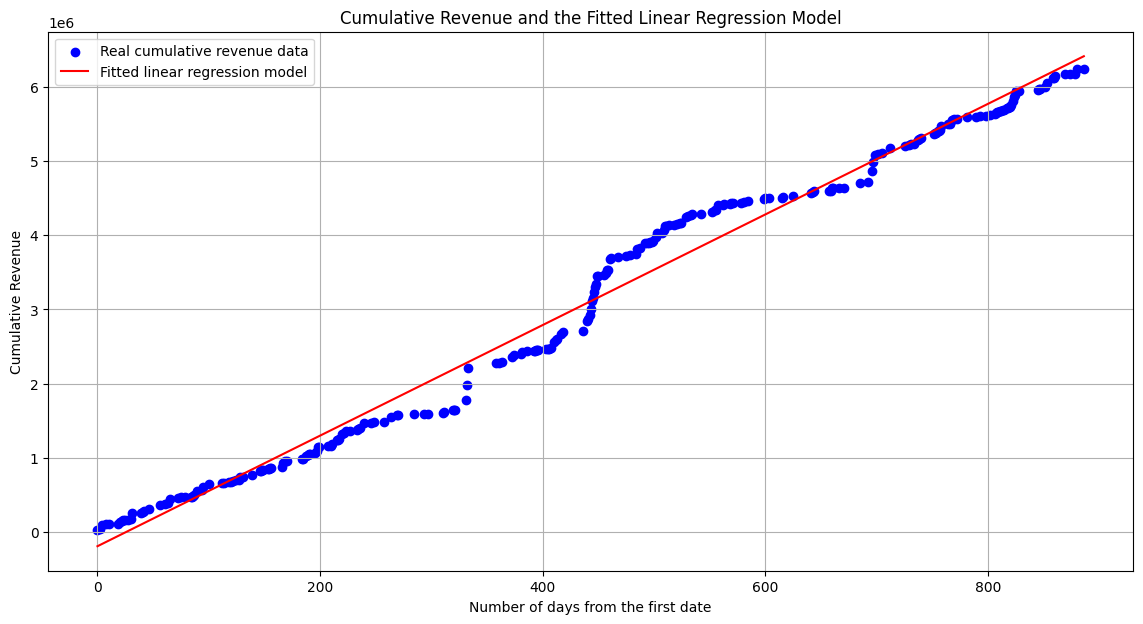

In [21]:
plt.figure(figsize=(14, 7))
plt.scatter(daily_revenue['day_number'], y, color='blue', label='Real cumulative revenue data')
plt.plot(daily_revenue['day_number'], y_pred, color='red', label='Fitted linear regression model')
plt.title('Cumulative Revenue and the Fitted Linear Regression Model')
plt.xlabel('Number of days from the first date')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Print out information about the model

In [22]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"The model's slope: {slope}")
print(f"The model's intercept: {intercept}")
print(f"The coefficient of determination (R^2): {r_squared}")

The model's slope: 7456.886249062745
The model's intercept: -192598.852056704
The coefficient of determination (R^2): 0.9843155402483849


##**The** coefficient of determination (R^2): 0.98 so the model is fit.




# Group the data by the mssys_bill_zip column and calculate the sum of the mssys_order_brutto_sum column for each group

In [23]:
sum_mssys_order_brutto_sum_by_mssys_bill_zip = df.groupby('mssys_bill_zip')['mssys_order_brutto_sum'].sum()

# Plotting the bar chart


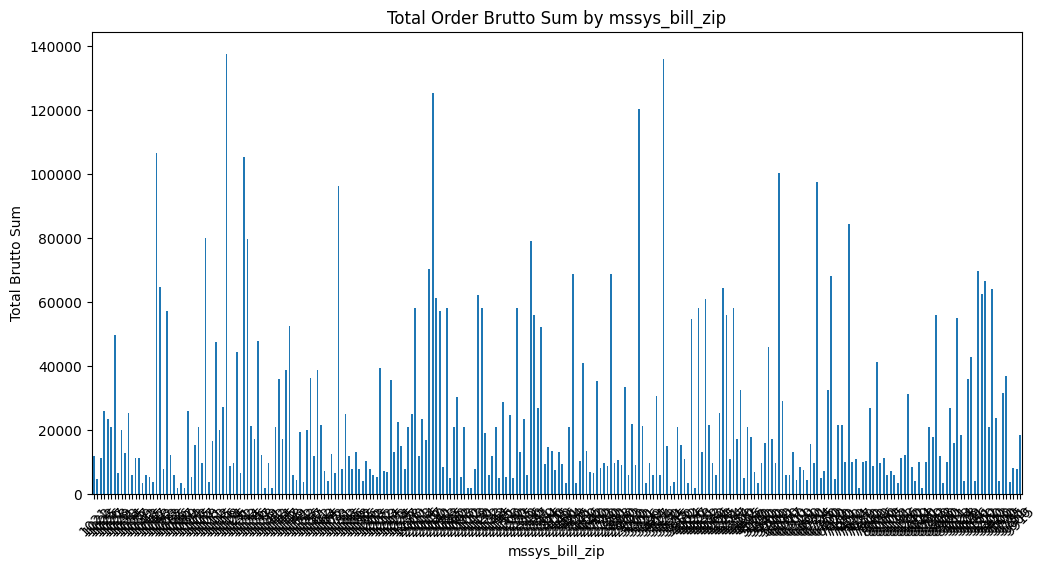

In [24]:
plt.figure(figsize=(12, 6))
sum_mssys_order_brutto_sum_by_mssys_bill_zip.plot(kind='bar')
plt.title('Total Order Brutto Sum by mssys_bill_zip')
plt.xlabel('mssys_bill_zip')
plt.ylabel('Total Brutto Sum')
plt.xticks(rotation=45)
plt.show()

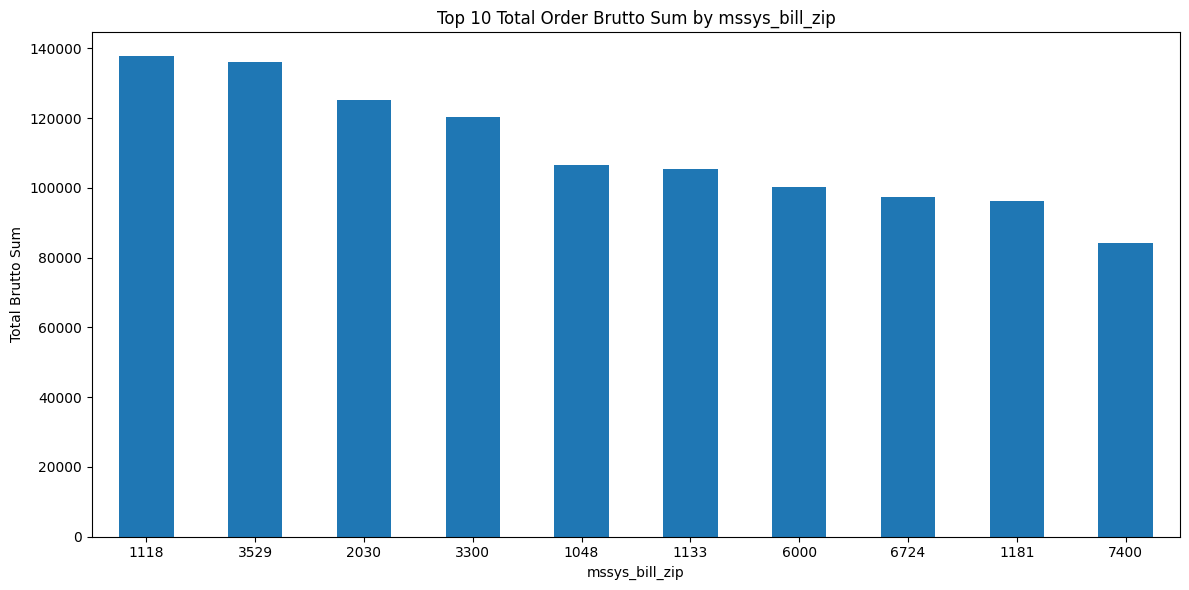

In [30]:
top_10_zip = sum_mssys_order_brutto_sum_by_mssys_bill_zip.nlargest(10)

plt.figure(figsize=(12, 6))
top_10_zip.plot.bar()
plt.title('Top 10 Total Order Brutto Sum by mssys_bill_zip')
plt.xlabel('mssys_bill_zip')
plt.ylabel('Total Brutto Sum')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
sum_mssys_order_brutto_sum_by_mssys_payment_method = df.groupby('mssys_payment_method')['mssys_order_brutto_sum'].sum()
sum_mssys_order_brutto_sum_by_mssys_payment_method


mssys_payment_method
1    1280522.0
4    4964367.0
Name: mssys_order_brutto_sum, dtype: float64